# Итоговая работа.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import scipy.stats as sts
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])


**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [3]:
# a)
user_similarity = pairwise_distances(raitings, metric='cosine')
df = pd.DataFrame(user_similarity)
df

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.173971,0.150785,0.216599,0.180824,0.258815,0.272642,0.190325,0.089340,0.139892
1,0.173971,0.000000,0.187657,0.153647,0.128619,0.172869,0.173703,0.199740,0.174737,0.180319
2,0.150785,0.187657,0.000000,0.153306,0.216057,0.209020,0.323838,0.237104,0.178879,0.081269
3,0.216599,0.153647,0.153306,0.000000,0.308466,0.213342,0.167258,0.170653,0.222933,0.141131
4,0.180824,0.128619,0.216057,0.308466,0.000000,0.223557,0.217995,0.187631,0.120515,0.154252
5,0.258815,0.172869,0.209020,0.213342,0.223557,0.000000,0.259882,0.155483,0.193771,0.144851
6,0.272642,0.173703,0.323838,0.167258,0.217995,0.259882,0.000000,0.173308,0.188700,0.208453
7,0.190325,0.199740,0.237104,0.170653,0.187631,0.155483,0.173308,0.000000,0.201872,0.163178
8,0.089340,0.174737,0.178879,0.222933,0.120515,0.193771,0.188700,0.201872,0.000000,0.099062
9,0.139892,0.180319,0.081269,0.141131,0.154252,0.144851,0.208453,0.163178,0.099062,0.000000


In [4]:
res = df[df > 0].idxmin(axis=1)

print("10 пар наиболее похожих пользователей:")
for index, val in res.iteritems():
    print((index, val))

10 пар наиболее похожих пользователей:
(0, 8)
(1, 4)
(2, 9)
(3, 9)
(4, 8)
(5, 9)
(6, 3)
(7, 5)
(8, 0)
(9, 2)


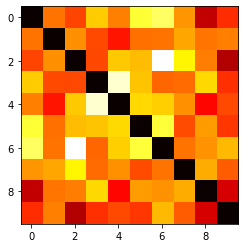

In [5]:
plt.imshow(user_similarity, cmap='hot', interpolation='nearest')
plt.show()

In [6]:
# b)
pca = PCA(n_components=5)
pca.fit(raitings)
pca.transform(raitings)

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [7]:
from sympy import diff, symbols, cos, sin, tan
from scipy.misc import derivative


In [8]:
def f(x):
    return np.tan(np.sin(x) + np.cos(2 * x + 3)) ** 2

x0 = 1
print(f'Значение производной в точке x0={x0}: {derivative(f, 1.0, dx=1e-6)}')

Значение производной в точке x0=1: 55.3859176464222


In [9]:
x = symbols('x')
y = tan(sin(x) + cos(2 * x + 3)) ** 2
yprime = diff(y)
print(yprime)
print(f'Значение производной в точке x0={x0}: {yprime.evalf(subs={x:1})}')

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))
Значение производной в точке x0=1: 55.3859176353379


## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [10]:
from scipy.optimize import differential_evolution, minimize

In [11]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [12]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [13]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [14]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [15]:
bounds = [(-30,30), (-30,30)]

result1 = differential_evolution(
    func=error, strategy='best1bin', popsize=3, tol=0.01, atol=0, mutation=(0.5, 1), 
    recombination=0.7, updating='deferred', bounds=bounds, seed=42)
    
result1   

     fun: 228.35685185569488
     jac: array([4.13905641, 7.53523688])
 message: 'Optimization terminated successfully.'
    nfev: 324
     nit: 2
 success: True
       x: array([  1.95112858, -22.30888755])

In [16]:
a = result1.x[0]
b = result1.x[1]

 # Вывод результатов:
print('a =', a)
print('b =', b)

a = 1.951128581730124
b = -22.30888754719492


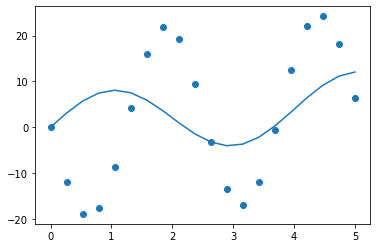

In [27]:
plt.scatter(x, fx)
plt.plot(x, f(x, a, b))

In [18]:
res = minimize(error,x,method='COBYLA')
res

     fun: 236.48672882528098
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 340
  status: 1
 success: True
       x: array([2.15980534, 0.26478944, 0.45911254, 0.83430374, 1.09914353,
       1.31457955, 1.64555639, 1.81110499, 2.10966622, 2.12804951,
       2.67961604, 2.78323493, 3.0887256 , 3.37341739, 3.83080566,
       4.10298417, 4.21940945, 4.58929211, 4.69753657, 4.88010067])

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [19]:
rv = np.random.randint(0, 50, size = 20)
rv

array([ 3, 24, 33, 26, 48, 32,  3, 14, 42, 11, 42, 45, 19,  7, 25, 14, 33,
       42, 32, 27])

In [20]:
mean = []
sub_sample_size = 20
loc, scale = 0., 1.

for i in range(1000):
    s = np.random.laplace(loc, scale, sub_sample_size)
    mean.append(s.mean())

(array([ 1.,  0.,  0.,  0.,  0.,  3.,  0.,  4.,  1.,  8.,  9.,  8., 19.,
        16., 22., 30., 33., 36., 22., 37., 33., 50., 48., 53., 58., 55.,
        57., 58., 45., 36., 37., 39., 33., 24., 21., 29., 20., 10., 13.,
         9., 10.,  2.,  0.,  3.,  1.,  0.,  5.,  1.,  0.,  1.]),
 array([-1.06413793, -1.02132118, -0.97850443, -0.93568768, -0.89287093,
        -0.85005417, -0.80723742, -0.76442067, -0.72160392, -0.67878717,
        -0.63597042, -0.59315367, -0.55033692, -0.50752017, -0.46470342,
        -0.42188667, -0.37906991, -0.33625316, -0.29343641, -0.25061966,
        -0.20780291, -0.16498616, -0.12216941, -0.07935266, -0.03653591,
         0.00628084,  0.04909759,  0.09191435,  0.1347311 ,  0.17754785,
         0.2203646 ,  0.26318135,  0.3059981 ,  0.34881485,  0.3916316 ,
         0.43444835,  0.4772651 ,  0.52008186,  0.56289861,  0.60571536,
         0.64853211,  0.69134886,  0.73416561,  0.77698236,  0.81979911,
         0.86261586,  0.90543261,  0.94824936,  0.99106612,

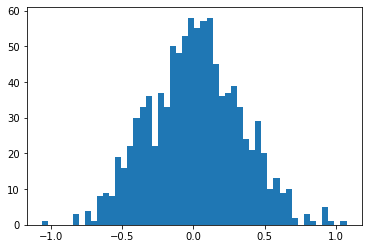

In [21]:
plt.hist(mean, 50, label='mean distribution')

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [22]:
m = np.array([[1, 4],
              [1, 1]])
m

array([[1, 4],
       [1, 1]])

In [23]:
w,v = np.linalg.eig(m)
print('собственные значения', w)
print('собственные вектора', v)

собственные значения [ 3. -1.]
собственные вектора [[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Вычислим в ручную

## Сначала найдём собственные значения

$$\begin{pmatrix} 1 & 4 \\ 1 & 1 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} = \lambda \begin{pmatrix} x \\ y \end{pmatrix}$$

$$\begin{pmatrix} x & 4y \\ x & y \end{pmatrix} = \begin{pmatrix} \lambda x \\ \lambda y \end{pmatrix}$$

\begin{equation}
\left\{
\begin{array}{c}
    x+4y=\lambda x \\
    x+y=\lambda y
\end{array}
\right.
\end{equation}

\begin{equation}
\left\{
\begin{array}{c}
    x+4y-\lambda x=0 \\
    x+y-\lambda y=0
\end{array}
\right.
\end{equation}

\begin{equation}
\left\{
\begin{array}{c}
    (1 -\lambda )x+4y=0 \\
    x+(1 -\lambda )y=0
\end{array}
\right.
\end{equation}

По определению, собственный вектор не может быть нулевым, поэтому нас не устраивает тривиальное решение x = 0, y = 0 системы. Следовательно, уравнения линейно зависимы и определитель матрицы системы равен нулю:

$$\begin{bmatrix} 1-\lambda & 4 \\ 1 & 1-\lambda \end{bmatrix} = 0$$

Составим характеристическое уравнение, раскроем определитель и решим квадратное уравнение:

$$(1-\lambda)(1-\lambda)-1\cdot 4=0$$

$$\lambda ^{2}-2\lambda-3=0$$

$$D = 4-4\cdot 1\cdot (-3) = 16$$

$$\sqrt{16}=4$$

$$\lambda_1 = \left(\frac{2 - 4}{2}\right)=-1$$

$$\lambda_2 = \left(\frac{2 + 4}{2}\right)=3$$

Таким образом, собственные значения: $\lambda_1 = -1, \lambda_1 = 3$

## Теперь найдём собственные векторы

Рассмотрим собственное число $\lambda_1 = -1$ и подставим значение в систему уравнений, найденную выше

$$\begin{equation} \left\{ \begin{array}{c} (1 -\lambda )x+4y=0 \\ x+(1 -\lambda )y=0 \end{array} \right. \end{equation}$$

$$\begin{equation} \left\{ \begin{array}{c} 2x+4y=0 \\ x+2y=0 \end{array} \right. \end{equation} \Rightarrow x=-2y$$

Придавая переменной $y$ (либо $x$) произвольные значения, мы получаем бесконечно много собственных векторов. Все они будут коллинеарны друг другу, и поэтому нам достаточно указать один из них.

$$y = -1 \\ x = 2$$